In [174]:
import pandas as pd             # importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [175]:
# Part 1 Graphical analysis

In [3]:
data= pd.read_csv('Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State_Final_dataset.csv') #loading data

In [4]:
data.shape  # checking dimensions of the data

(1944, 14)

In [5]:
data.head() #checking first five rows

,Data as of,Start week,End Week,Group,State,Indicator,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/9/2020,2/1/2020,2/1/2020,By week,United States,Week-ending,0,"58,611",0.99,"3,799",0,479.0,"4,278",NaN
1,10/9/2020,2/8/2020,2/8/2020,By week,United States,Week-ending,1,"59,320",0.99,"3,803",0,521.0,"4,325",NaN
2,10/9/2020,2/15/2020,2/15/2020,By week,United States,Week-ending,0,"58,731",1.00,"3,831",0,559.0,"4,390",NaN
3,10/9/2020,2/22/2020,2/22/2020,By week,United States,Week-ending,5,"58,764",1.01,"3,699",1,565.0,"4,268",NaN
4,10/9/2020,2/29/2020,2/29/2020,By week,United States,Week-ending,10,"59,200",1.03,"3,824",5,654.0,"4,483",NaN


In [6]:
data.dtypes  #checking data types

Data as of                                   object
Start week                                   object
End Week                                     object
Group                                        object
State                                        object
Indicator                                    object
COVID-19 Deaths                              object
Total Deaths                                 object
Percent of Expected Deaths                  float64
Pneumonia Deaths                             object
Pneumonia and COVID-19 Deaths                object
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths     object
Footnote                                     object
dtype: object

In [7]:
# changing some types to float.
data['Pneumonia, Influenza, or COVID-19 Deaths'] = pd.to_numeric(data['Pneumonia, Influenza, or COVID-19 Deaths'], errors='coerce')
data['Pneumonia and COVID-19 Deaths'] = pd.to_numeric(data['Pneumonia and COVID-19 Deaths'], errors='coerce')
data['Pneumonia Deaths'] = pd.to_numeric(data['Pneumonia Deaths'], errors='coerce')
data['Total Deaths'] = pd.to_numeric(data['Total Deaths'], errors='coerce')
data['COVID-19 Deaths'] = pd.to_numeric(data['COVID-19 Deaths'], errors='coerce')

In [8]:
print("Describe Data")
print(data.describe())     # getting a summary of all the numerical variables in the data
print("Summarized Data")
print(data.describe(include=['O']))  # calling on a summary of all the other types variables (i.e. objective types)

Describe Data
       COVID-19 Deaths  Total Deaths  Percent of Expected Deaths  \
count      1574.000000   1084.000000                 1944.000000   
mean         92.012706    432.673432                    1.102109   
std         156.637201    276.417646                    0.338390   
min           0.000000      0.000000                    0.000000   
25%           0.000000    194.000000                    1.010000   
50%          37.000000    370.500000                    1.080000   
75%         101.000000    647.000000                    1.170000   
max         995.000000    998.000000                    7.370000   

       Pneumonia Deaths  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
count       1710.000000                    1434.000000       1331.000000   
mean         110.234503                      54.978382          8.688204   
std          142.766823                     112.274569         52.133170   
min            0.000000                       0.000000          0.000

In [9]:
data1= data.replace(',np.nan')  #filling empty spaces with nan

Text(0, 0.5, 'Count')

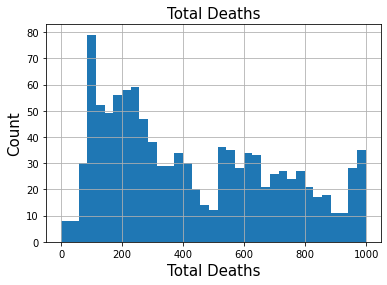

In [10]:
data1.hist(column='Total Deaths', bins=35)
plt.title('Total Deaths', fontsize=15)
plt.xlabel('Total Deaths',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0.5, 0, 'Influenza Deaths')

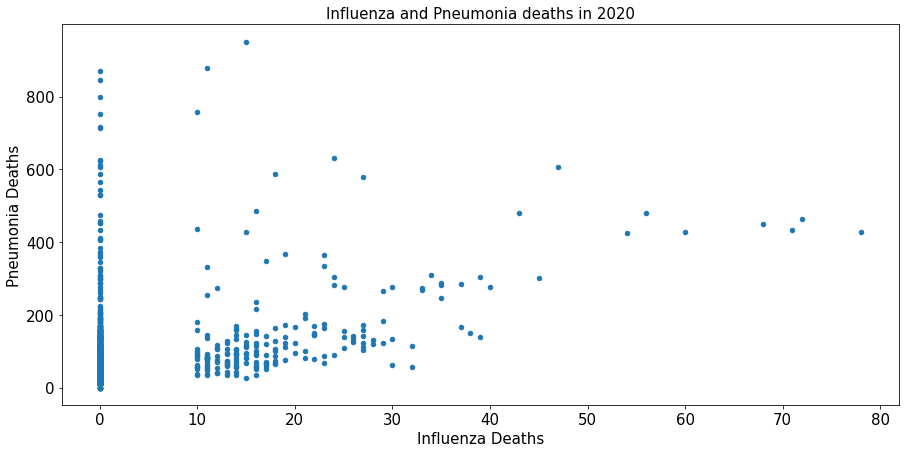

In [11]:
plt.rcParams['figure.figsize'] = (15, 7)
data1.plot.scatter(x="Influenza Deaths", y="Pneumonia Deaths", fontsize=15)  #scattergram influenza and pneumonia
plt.title('Influenza and Pneumonia deaths in 2020', fontsize=15)
plt.ylabel('Pneumonia Deaths', fontsize=15)
plt.xlabel('Influenza Deaths', fontsize=15)

Text(0, 0.5, 'Influenza Deaths')

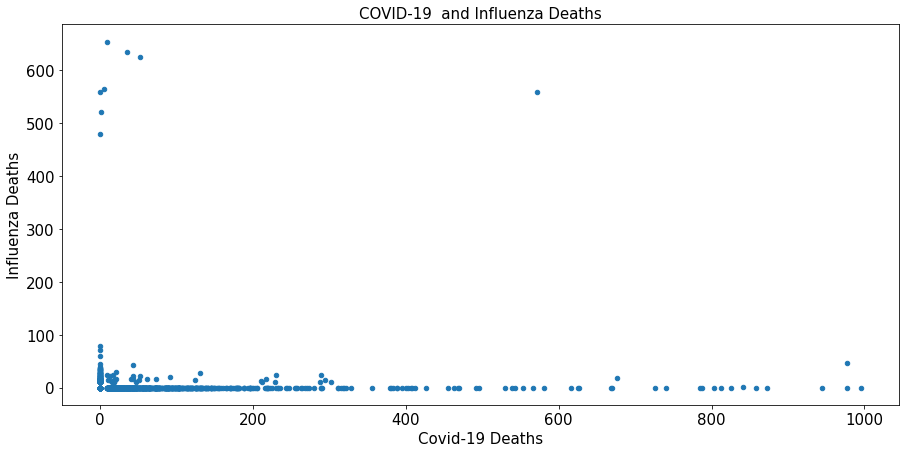

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)
data1.plot.scatter(x="COVID-19 Deaths", y="Influenza Deaths", fontsize=15)  #scattergram influenza and pneumonia
plt.title('COVID-19  and Influenza Deaths', fontsize=15)
plt.xlabel('Covid-19 Deaths', fontsize=15)
plt.ylabel('Influenza Deaths', fontsize=15)

Text(0, 0.5, 'Pneumonia Deaths')

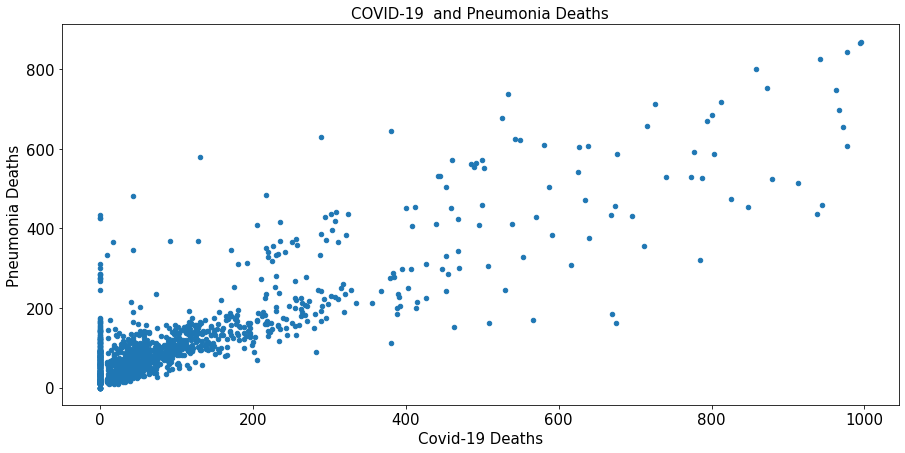

In [13]:
plt.rcParams['figure.figsize'] = (15, 7)
data1.plot.scatter(x="COVID-19 Deaths", y="Pneumonia Deaths", fontsize=15)  #scattergram influenza and pneumonia
plt.title('COVID-19  and Pneumonia Deaths', fontsize=15)
plt.xlabel('Covid-19 Deaths', fontsize=15)
plt.ylabel('Pneumonia Deaths', fontsize=15)

In [14]:
data3= data1[~data1.State.str.contains('United States')]  #getting rid of the united states data for chart analysis

Text(0.5, 0, 'State')

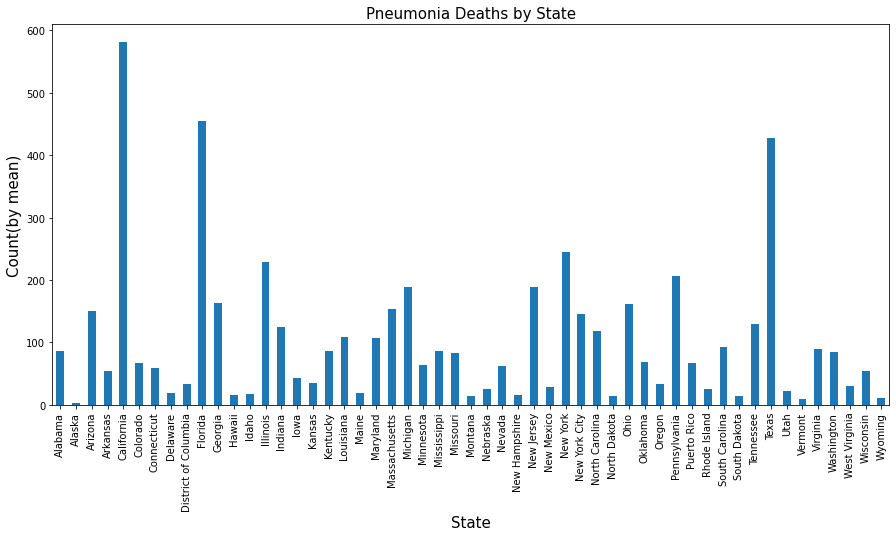

In [15]:
plt.rcParams['figure.figsize'] = (15, 7)           #setting plot size
data3.groupby('State')['Pneumonia Deaths'].mean().plot(kind='bar')  # creating plot for pneumonia date by state
plt.ylabel('Count(by mean)',fontsize=15)
plt.title('Pneumonia Deaths by State', fontsize=15)
plt.xlabel('State',fontsize=15)

Text(0.5, 0, 'State')

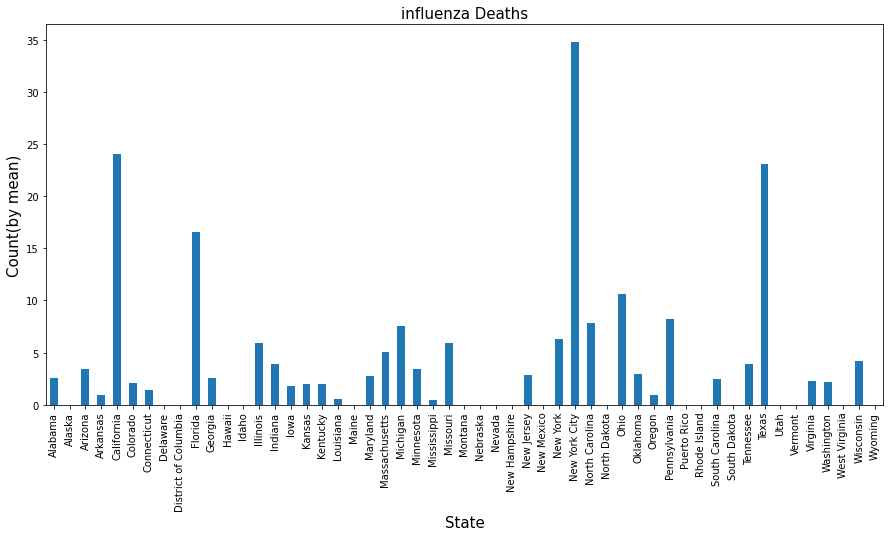

In [16]:
plt.rcParams['figure.figsize'] = (15, 7)           #setting plot size
data3.groupby('State')['Influenza Deaths'].mean().plot(kind='bar')  # creating plot for flu data by state
plt.ylabel('Count(by mean)',fontsize=15)
plt.title('influenza Deaths', fontsize=15)
plt.xlabel('State',fontsize=15)

Text(0.5, 0, 'State')

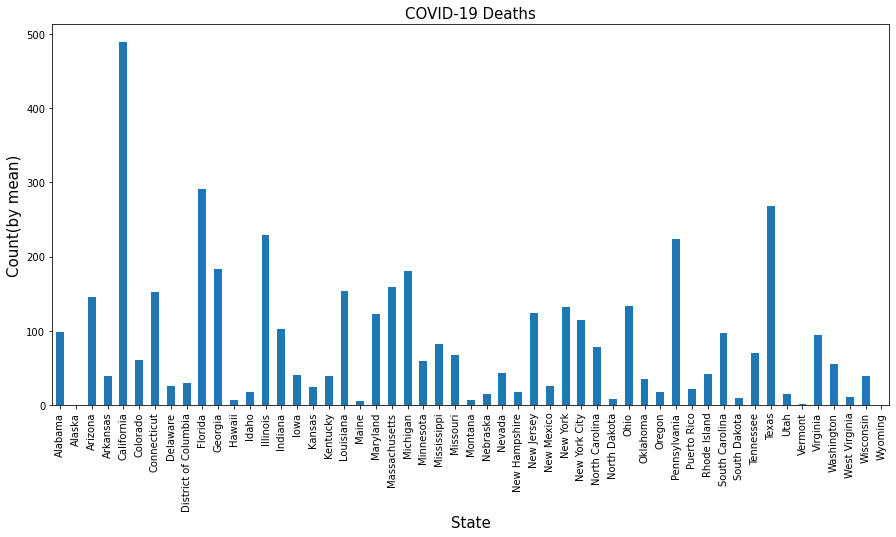

In [17]:
plt.rcParams['figure.figsize'] = (15, 7)           #setting plot size
data3.groupby('State')['COVID-19 Deaths'].mean().plot(kind='bar')  # creating plot for covid date by state
plt.ylabel('Count(by mean)',fontsize=15)
plt.title('COVID-19 Deaths', fontsize=15)
plt.xlabel('State',fontsize=15)

In [18]:
data3['End Week']= pd.to_datetime(data1['End Week'])  # converting string to datetime

C:\Users\EF\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'End Week')

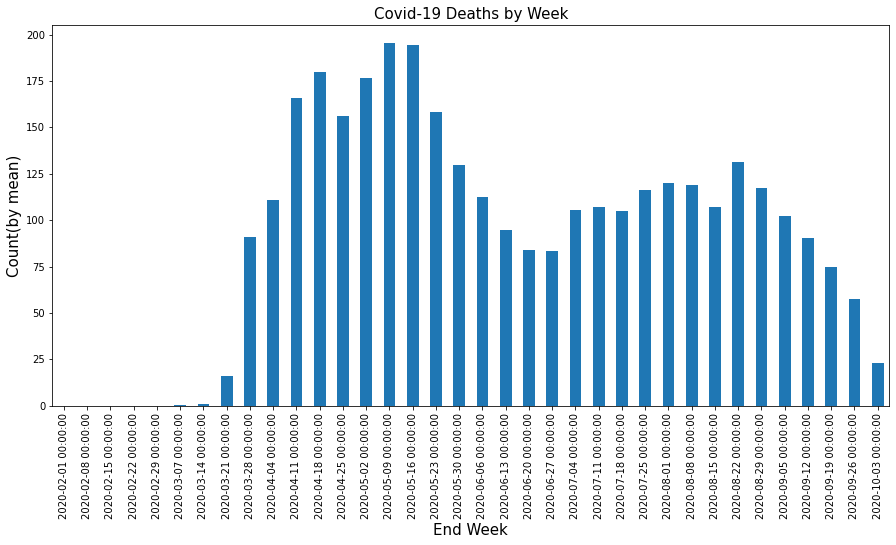

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)        # creating bar plot of covid deaths by week occurances throughout the year.
data3.groupby('End Week', sort=True)['COVID-19 Deaths'].mean().plot(kind='bar')
plt.ylabel('Count(by mean)', fontsize=15)
plt.title('Covid-19 Deaths by Week', fontsize=15)
plt.xlabel('End Week', fontsize=15)

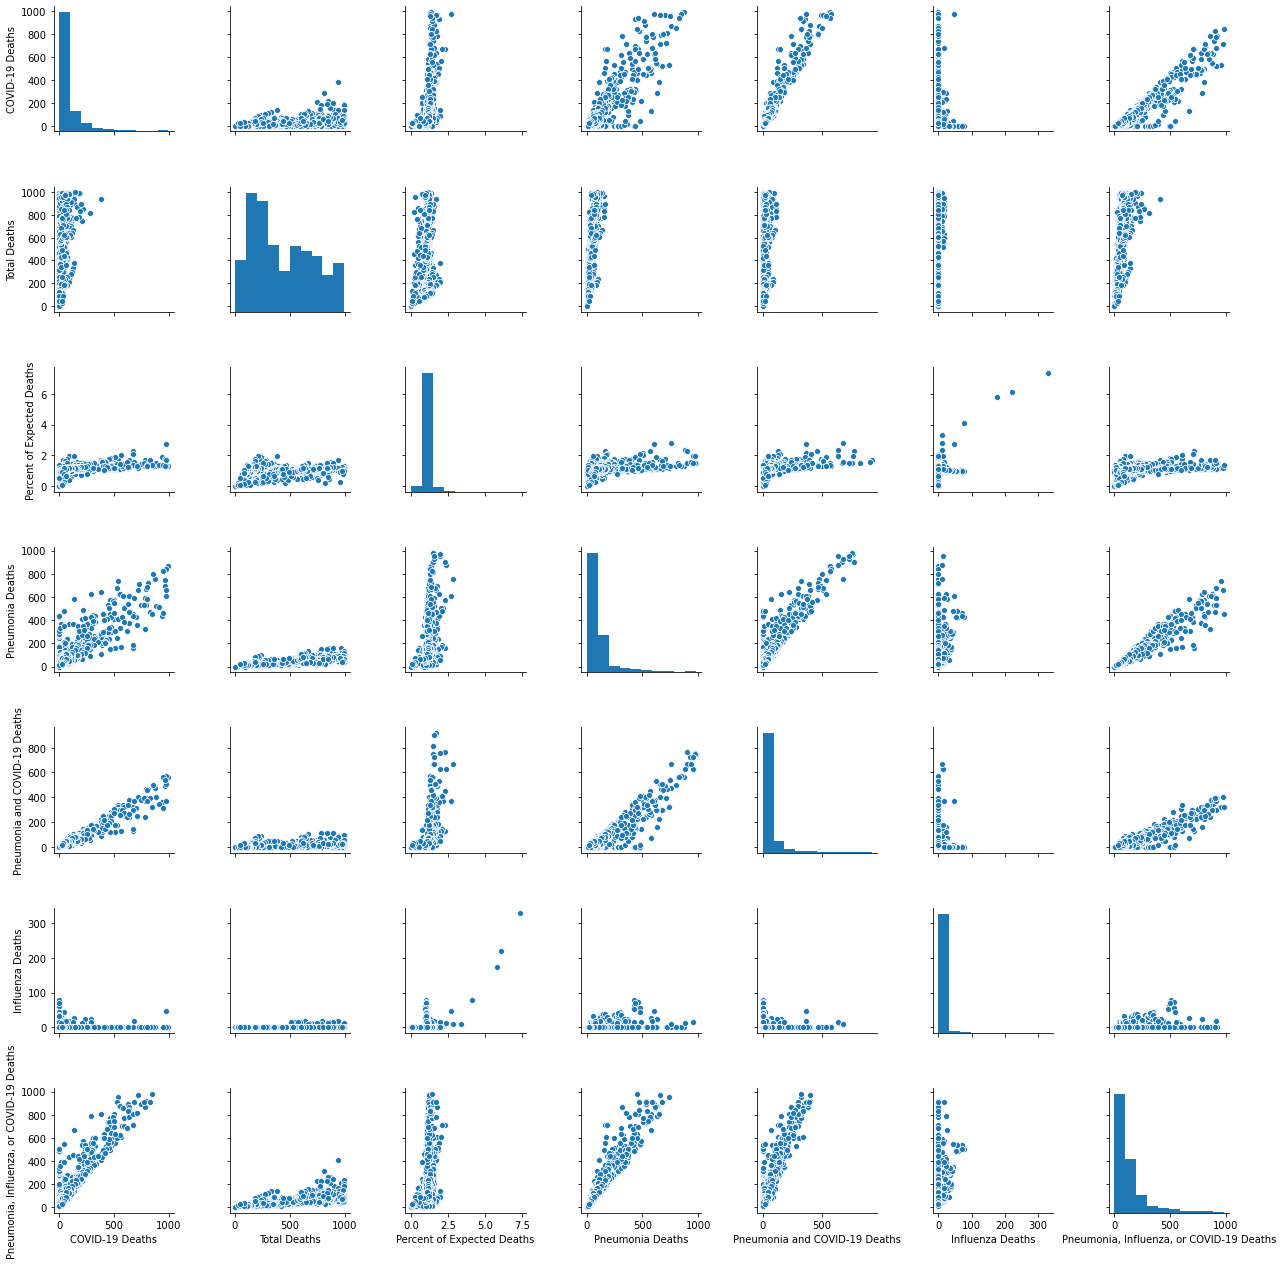

In [20]:
sns.pairplot(data3.loc[:,data3.dtypes == 'float64'])  #using seaborn to visualize the distribution among all numeric variables.

Text(0.5, 1.0, 'Correlation among numerical features')

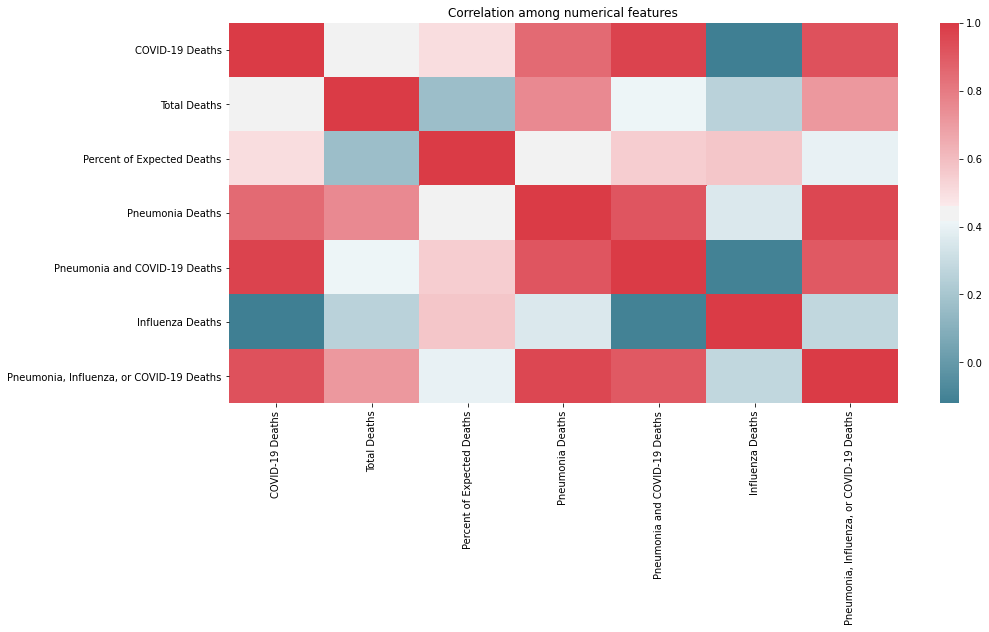

In [21]:
corr = data3.loc[:,data3.dtypes == 'float64'].corr()   # creating pearson correlation to apply for visualizations of numeric features
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation among numerical features')

In [22]:
# Part 2 Dimension and feature reduction

In [23]:
data3.tail()

,Data as of,Start week,End Week,Group,State,Indicator,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
1939,10/9/2020,9/5/2020,2020-09-05,By week,Puerto Rico,Week-ending,42.0,435.0,0.82,68.0,28.0,NaN,82.0,One or more data cells have counts between 1–9...
1940,10/9/2020,9/12/2020,2020-09-12,By week,Puerto Rico,Week-ending,65.0,358.0,0.64,69.0,44.0,0.0,90.0,NaN
1941,10/9/2020,9/19/2020,2020-09-19,By week,Puerto Rico,Week-ending,44.0,181.0,0.31,41.0,28.0,0.0,57.0,NaN
1942,10/9/2020,9/26/2020,2020-09-26,By week,Puerto Rico,Week-ending,35.0,85.0,0.13,32.0,28.0,0.0,39.0,NaN
1943,10/9/2020,10/3/2020,2020-10-03,By week,Puerto Rico,Week-ending,25.0,48.0,0.08,23.0,19.0,0.0,29.0,NaN


In [24]:
data3= data3.fillna(0)  # need to fill in values where NaN are placed 

In [25]:
# reducing the number of features down to 4. All other features are not necessary for this analysis.

data4= data3[['Pneumonia Deaths', 'Influenza Deaths','COVID-19 Deaths', 'Percent of Expected Deaths', 'State']]

In [26]:
data4

,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Percent of Expected Deaths,State
36,56.0,14.0,0.0,0.94,Alabama
37,61.0,10.0,0.0,1.01,Alabama
38,76.0,0.0,0.0,1.01,Alabama
39,68.0,0.0,0.0,1.01,Alabama
40,63.0,14.0,0.0,1.12,Alabama
...,...,...,...,...,...
1939,68.0,0.0,42.0,0.82,Puerto Rico
1940,69.0,0.0,65.0,0.64,Puerto Rico
1941,41.0,0.0,44.0,0.31,Puerto Rico
1942,32.0,0.0,35.0,0.13,Puerto Rico


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A413BF0D08>,
      dtype=object)

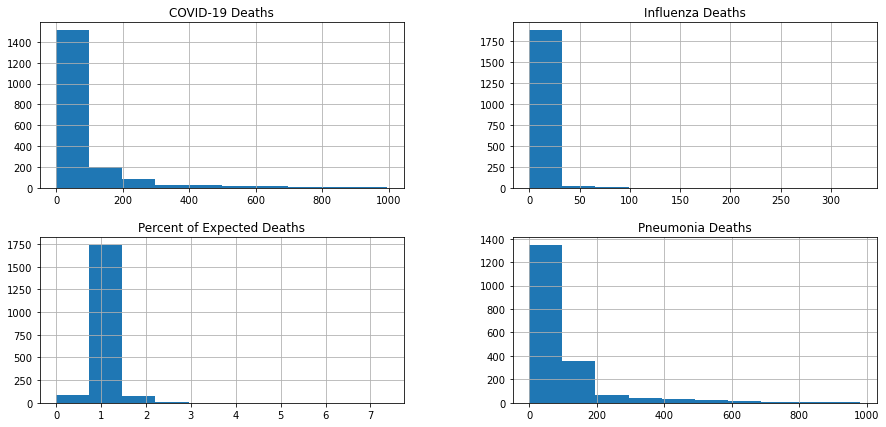

In [27]:
data4.hist()  # as displayed in the histograms its very evident that the data appears extremely skewed and needs some work. 


In [28]:
# performing log transformation on the features in the dataset

In [29]:
def log_transformation(data4):  # using the log transformation log(1+x) to handle the smaller values in the skewed data
    return data4.apply(np.log1p)

In [30]:
#appying function to all numerical features to get log values.

data4['log_Influenza Deaths'] = log_transformation(data4['Influenza Deaths'])  
data4['log_Pneumonia Deaths'] = log_transformation(data4['Pneumonia Deaths'])
data4['log_COVID-19 Deaths'] = log_transformation(data4['COVID-19 Deaths'])
data4['log_Percent of Expected Deaths'] = log_transformation(data4['Percent of Expected Deaths'])

C:\Users\EF\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\EF\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\EF\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [31]:
print(data4.describe())  #we can see the log function has brought our distribution to a somewhat normalization

       Pneumonia Deaths  Influenza Deaths  COVID-19 Deaths  \
count       1908.000000       1908.000000      1908.000000   
mean          98.795073          2.541929        75.110587   
std          139.272601         12.329416       145.040558   
min            0.000000          0.000000         0.000000   
25%           21.000000          0.000000         0.000000   
50%           59.000000          0.000000        22.000000   
75%          110.250000          0.000000        79.000000   
max          980.000000        329.000000       995.000000   

       Percent of Expected Deaths  log_Influenza Deaths  log_Pneumonia Deaths  \
count                 1908.000000           1908.000000           1908.000000   
mean                     1.101698              0.323893              3.740188   
std                      0.340742              0.942908              1.612175   
min                      0.000000              0.000000              0.000000   
25%                      1.000000   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A417BEC8C8>,
      dtype=object)

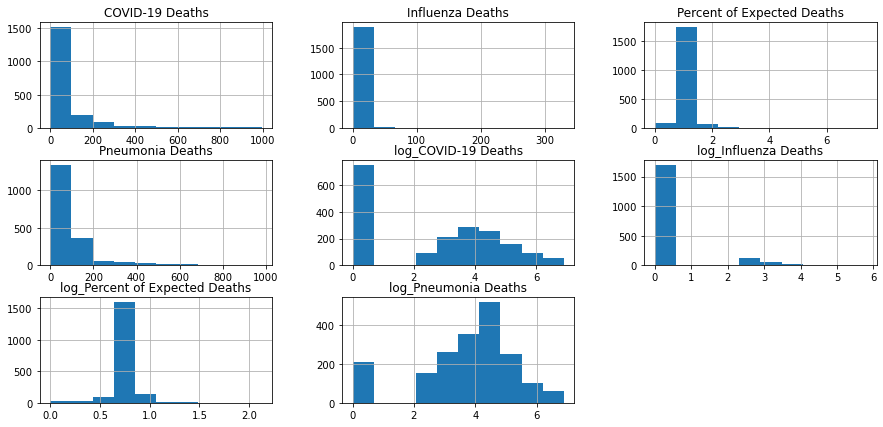

In [32]:
data4.hist()  # we can see the log histograms appear to have a better distribution than orginally.

In [33]:
# creating new dataframe using only log value features and one categorical feature

data5= data4[['log_Influenza Deaths', 'log_Pneumonia Deaths', 'log_COVID-19 Deaths', 'log_Percent of Expected Deaths', 'State']] 

In [34]:
# function to break states down to 5 regions to reduce number of features because if not when one hot encoder is applied the total of features will be grow out of control.

def label_states (row):
    if row['State'] in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'North-East'
    if row['State'] in ['Wisconsin', 'Montana','Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wyoming', 'Kansas']:
        return 'Midwest'
    if row['State'] in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        return 'South'
    if row['State'] in ['California','Oregon', 'Washinghton', 'Arizona', 'New Mexico', 'Colorado','Utah', 'Nevada', 'Alaska', 'Hawaii' ]:
        return 'West'
    if row['State'] in ['Puerto Rico']:
        return 'US Territory'

In [35]:
 # applying function above to my data set, creating a new column called Region.

data5['Region'] = data5.apply(lambda row: label_states(row), axis=1)      

C:\Users\EF\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
data5

,log_Influenza Deaths,log_Pneumonia Deaths,log_COVID-19 Deaths,log_Percent of Expected Deaths,State,Region
36,2.708050,4.043051,0.000000,0.662688,Alabama,South
37,2.397895,4.127134,0.000000,0.698135,Alabama,South
38,0.000000,4.343805,0.000000,0.698135,Alabama,South
39,0.000000,4.234107,0.000000,0.698135,Alabama,South
40,2.708050,4.158883,0.000000,0.751416,Alabama,South
...,...,...,...,...,...,...
1939,0.000000,4.234107,3.761200,0.598837,Puerto Rico,US Territory
1940,0.000000,4.248495,4.189655,0.494696,Puerto Rico,US Territory
1941,0.000000,3.737670,3.806662,0.270027,Puerto Rico,US Territory
1942,0.000000,3.496508,3.583519,0.122218,Puerto Rico,US Territory


In [37]:
data5= data5.drop(['State'], axis=1)  # dropping state column out of data set

In [38]:
# creating one hot encoder for regions in region column to transform categorical to numerical value for analysis.

one_hot_df = pd.get_dummies(data5, columns=['Region'], prefix='Region')       

In [39]:
one_hot_df.head(7)  # displaying the first 7 rows of dataset.

,log_Influenza Deaths,log_Pneumonia Deaths,log_COVID-19 Deaths,log_Percent of Expected Deaths,Region_Midwest,Region_North-East,Region_South,Region_US Territory,Region_West
36,2.708050,4.043051,0.0,0.662688,0,0,1,0,0
37,2.397895,4.127134,0.0,0.698135,0,0,1,0,0
38,0.000000,4.343805,0.0,0.698135,0,0,1,0,0
39,0.000000,4.234107,0.0,0.698135,0,0,1,0,0
40,2.708050,4.158883,0.0,0.751416,0,0,1,0,0
41,2.639057,4.077537,0.0,0.698135,0,0,1,0,0
42,0.000000,4.127134,0.0,0.693147,0,0,1,0,0


In [40]:
one_hot_df.cov()  # glancing at the covariance of data

,log_Influenza Deaths,log_Pneumonia Deaths,log_COVID-19 Deaths,log_Percent of Expected Deaths,Region_Midwest,Region_North-East,Region_South,Region_US Territory,Region_West
log_Influenza Deaths,0.889075,0.298344,-0.606772,0.010387,0.008384,0.005863,-0.000174,-0.006114,-0.015387
log_Pneumonia Deaths,0.298344,2.599108,2.094220,0.063584,-0.062616,-0.056142,0.155068,0.008443,-0.041196
log_COVID-19 Deaths,-0.606772,2.094220,4.930244,0.083346,-0.019578,-0.082385,0.146501,-0.014149,-0.028063
log_Percent of Expected Deaths,0.010387,0.063584,0.083346,0.019250,-0.003001,0.001499,-0.000319,-0.001448,0.000316
Region_Midwest,0.008384,-0.062616,-0.019578,-0.003001,0.194477,-0.044879,-0.084772,-0.004987,-0.044879
Region_North-East,0.005863,-0.056142,-0.082385,0.001499,-0.044879,0.141049,-0.054496,-0.003206,-0.028851
Region_South,-0.000174,0.155068,0.146501,-0.000319,-0.084772,-0.054496,0.217985,-0.006055,-0.054496
Region_US Territory,-0.006114,0.008443,-0.014149,-0.001448,-0.004987,-0.003206,-0.006055,0.018522,-0.003206
Region_West,-0.015387,-0.041196,-0.028063,0.000316,-0.044879,-0.028851,-0.054496,-0.003206,0.141049


In [41]:
one_hot_df.corr()  #pearson correlation

,log_Influenza Deaths,log_Pneumonia Deaths,log_COVID-19 Deaths,log_Percent of Expected Deaths,Region_Midwest,Region_North-East,Region_South,Region_US Territory,Region_West
log_Influenza Deaths,1.000000,0.196262,-0.289816,0.079399,0.020163,0.016556,-0.000396,-0.047648,-0.043451
log_Pneumonia Deaths,0.196262,1.000000,0.585027,0.284266,-0.088072,-0.092723,0.206014,0.038479,-0.068039
log_COVID-19 Deaths,-0.289816,0.585027,1.000000,0.270546,-0.019994,-0.098793,0.141316,-0.046823,-0.033652
log_Percent of Expected Deaths,0.079399,0.284266,0.270546,1.000000,-0.049048,0.028765,-0.004924,-0.076691,0.006062
Region_Midwest,0.020163,-0.088072,-0.019994,-0.049048,1.000000,-0.270973,-0.411723,-0.083086,-0.270973
Region_North-East,0.016556,-0.092723,-0.098793,0.028765,-0.270973,1.000000,-0.310791,-0.062718,-0.204545
Region_South,-0.000396,0.206014,0.141316,-0.004924,-0.411723,-0.310791,1.000000,-0.095295,-0.310791
Region_US Territory,-0.047648,0.038479,-0.046823,-0.076691,-0.083086,-0.062718,-0.095295,1.000000,-0.062718
Region_West,-0.043451,-0.068039,-0.033652,0.006062,-0.270973,-0.204545,-0.310791,-0.062718,1.000000


In [42]:
one_hot_df.corr('spearman') #spearman correlation


,log_Influenza Deaths,log_Pneumonia Deaths,log_COVID-19 Deaths,log_Percent of Expected Deaths,Region_Midwest,Region_North-East,Region_South,Region_US Territory,Region_West
log_Influenza Deaths,1.000000,0.248860,-0.276031,-0.159468,0.024773,0.023060,0.003567,-0.048400,-0.050272
log_Pneumonia Deaths,0.248860,1.000000,0.660392,0.356710,-0.095345,-0.074147,0.241616,0.021205,-0.107274
log_COVID-19 Deaths,-0.276031,0.660392,1.000000,0.542788,-0.026115,-0.096977,0.166621,-0.058185,-0.049676
log_Percent of Expected Deaths,-0.159468,0.356710,0.542788,1.000000,-0.048647,-0.083629,0.112968,-0.085270,0.036266
Region_Midwest,0.024773,-0.095345,-0.026115,-0.048647,1.000000,-0.270973,-0.411723,-0.083086,-0.270973
Region_North-East,0.023060,-0.074147,-0.096977,-0.083629,-0.270973,1.000000,-0.310791,-0.062718,-0.204545
Region_South,0.003567,0.241616,0.166621,0.112968,-0.411723,-0.310791,1.000000,-0.095295,-0.310791
Region_US Territory,-0.048400,0.021205,-0.058185,-0.085270,-0.083086,-0.062718,-0.095295,1.000000,-0.062718
Region_West,-0.050272,-0.107274,-0.049676,0.036266,-0.270973,-0.204545,-0.310791,-0.062718,1.000000


In [43]:
# part 3

In [162]:
# import libraries
import yellowbrick
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot


In [45]:
data_x= one_hot_df[['log_Influenza Deaths','log_Pneumonia Deaths','log_Percent of Expected Deaths']]  # defining my x and y data
data_y= one_hot_df['log_COVID-19 Deaths']

In [115]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size =0.25, random_state=11)  # spliting data into training and testing groups using a 80/20 method.

In [116]:
print("No. of samples in training set: ", X_train.shape[0])     # displaying total number of training set values
print("No. of samples in validation set:", X_val.shape[0])      # displaying total number of validation set values

No. of samples in training set:  1431
No. of samples in validation set: 477


In [164]:
# import library
import yellowbrick
from yellowbrick.regressor import residuals_plot
import math
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [166]:
model2 = RandomForestRegressor(max_depth=5,random_state=20, max_features=3)  # going with a random forest regressor
model2.fit(X_train, y_train)        #fitting data


RandomForestRegressor(max_depth=5, max_features=3, random_state=20)

In [167]:
confidence= model2.score(X_val,y_val)  # confidence using Random forest regressor model, found this slightly better than other model.
print(confidence)

0.7235858734431297


In [168]:
# mean squared error on training data
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model2, X_train,y_train, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -1.440 (0.211)


In [169]:
# root mean squared error on training data

rmse= math.sqrt(1.440)
rmse

1.2

In [170]:
# importing library

from yellowbrick.regressor import CooksDistance

C:\Users\EF\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


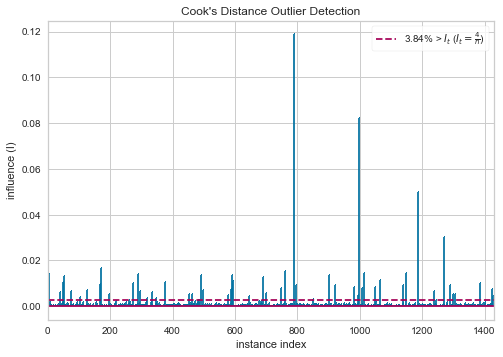

In [171]:
# applying cooks distance to data to measure instance influence on regression.
visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()

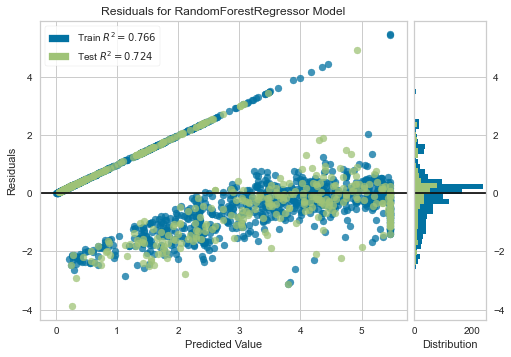

In [172]:
#Instantiate the visualizer
visualizer = ResidualsPlot(model2, hist=True, qqplot=False)

visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show()

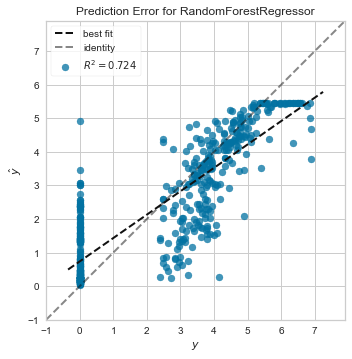

In [173]:
# prediction  error


visualizer = PredictionError(model2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the validation data
visualizer.show()                 # Finalize and render the figure